# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [11]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [11]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I booked through BA becaus...
1,✅ Trip Verified | British airways lost bags ...
2,✅ Trip Verified | The check in process and rew...
3,"✅ Trip Verified | We flew in November 2023, ..."
4,✅ Trip Verified | I left for London from Johan...


In [15]:
df.to_csv("British_airways_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [3]:
file = pd.read_csv("British_airways_reviews.csv")

In [5]:
file.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | I booked through BA becaus...
1,1,✅ Trip Verified | British airways lost bags ...
2,2,✅ Trip Verified | The check in process and rew...
3,3,"✅ Trip Verified | We flew in November 2023, ..."
4,4,✅ Trip Verified | I left for London from Johan...


In [7]:
file.info

<bound method DataFrame.info of      Unnamed: 0                                            reviews
0             0  ✅ Trip Verified |   I booked through BA becaus...
1             1  ✅ Trip Verified |   British airways lost bags ...
2             2  ✅ Trip Verified | The check in process and rew...
3             3  ✅ Trip Verified |   We flew in November 2023, ...
4             4  ✅ Trip Verified | I left for London from Johan...
..          ...                                                ...
995         995  ✅ Trip Verified | My flight was cancelled 3 da...
996         996  ✅ Trip Verified |  Hong Kong to Copenhagen via...
997         997  ✅ Trip Verified | London Gatwick to San Jose C...
998         998  Not Verified |  Inflight crew were very helpfu...
999         999  ✅ Trip Verified | From Toronto to Pisa British...

[1000 rows x 2 columns]>

In [9]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [11]:
file.drop(columns=["Unnamed: 0"]  ,inplace=True)

In [13]:
# Add a new column for verification status
file['verification_status'] = file['reviews'].str.extract(r'^(✅ Trip Verified|Not Verified)')
file['review_text'] = file['reviews'].str.replace(r'^(✅ Trip Verified|Not Verified)\s\|\s', '', regex=True)

In [15]:
file.head()

,reviews,verification_status,review_text
0,✅ Trip Verified | I booked through BA becaus...,✅ Trip Verified,I booked through BA because Loganair don’t h...
1,✅ Trip Verified | British airways lost bags ...,✅ Trip Verified,British airways lost bags in LHR then found ...
2,✅ Trip Verified | The check in process and rew...,✅ Trip Verified,The check in process and reward/loyalty progra...
3,"✅ Trip Verified | We flew in November 2023, ...",✅ Trip Verified,"We flew in November 2023, but it took this l..."
4,✅ Trip Verified | I left for London from Johan...,✅ Trip Verified,I left for London from Johannesburg at 21:15 o...


In [17]:
file.drop(columns=["reviews"]  ,inplace=True)

In [19]:
file.head()

,verification_status,review_text
0,✅ Trip Verified,I booked through BA because Loganair don’t h...
1,✅ Trip Verified,British airways lost bags in LHR then found ...
2,✅ Trip Verified,The check in process and reward/loyalty progra...
3,✅ Trip Verified,"We flew in November 2023, but it took this l..."
4,✅ Trip Verified,I left for London from Johannesburg at 21:15 o...


In [21]:
# Unique values in 'verification_status'
unique_verification_status = file['verification_status'].unique()

In [23]:
print("Unique values in 'verification_status':")
print(unique_verification_status)

Unique values in 'verification_status':
['✅ Trip Verified' 'Not Verified' nan]


In [25]:
# Clean 'verification_status' column by removing the green checkbox
file['verification_status'] = file['verification_status'].str.replace("✅ ", "", regex=False)

In [27]:
print("Cleaned 'verification_status' column:")
print(file['verification_status'].unique())

Cleaned 'verification_status' column:
['Trip Verified' 'Not Verified' nan]


In [29]:
file.sample(8)

,verification_status,review_text
517,Trip Verified,My 7am flight for a conference in June was ca...
849,Not Verified,British Airways (Comair) Johannesburg to Cape...
789,Trip Verified,Flight BA 282 on 11 February was delayed 173 ...
615,Not Verified,I am constantly amazed how British Airways co...
198,Trip Verified,Credit to BA - Flew to Singapore recently an...
972,Trip Verified,London to Dublin. It was never my choice to f...
126,Not Verified,British Airways cancelled my flight less tha...
701,Not Verified,Poorly mismanaged services this time. Disappo...


In [31]:
# Count Verified, Non-Verified, and NaN
verified_count = file['verification_status'].str.contains("Trip Verified", na=False).sum()
non_verified_count = file['verification_status'].str.contains("Not Verified", na=False).sum()
nan_count = file['verification_status'].isna().sum()

# Print the counts
print("Total Verified:", verified_count)
print("Total Non-Verified:", non_verified_count)
print("Total NaN:", nan_count)

Total Verified: 740
Total Non-Verified: 259
Total NaN: 1


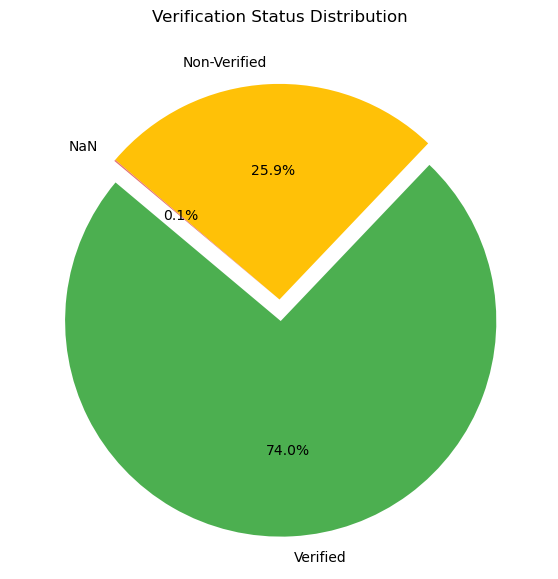

In [33]:
labels = ['Verified', 'Non-Verified', 'NaN']
sizes = [verified_count, non_verified_count, nan_count]
colors = ['#4CAF50', '#FFC107', '#E57373'] 
explode = (0.1, 0, 0)  # Highlight the Verified slice
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Verification Status Distribution')
plt.show()

In [35]:
# Combine all review_text into a single string
all_text = " ".join(text for text in file['review_text'].dropna())

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate(all_text)

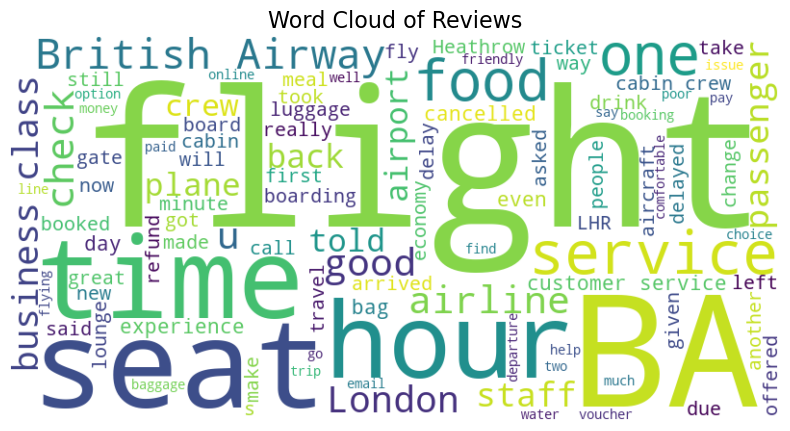

In [36]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews', fontsize=16)
plt.show()

In [37]:
# Filter reviews by verification status
verified_text = " ".join(text for text in file[file['verification_status'] == "Trip Verified"]['review_text'].dropna())
non_verified_text = " ".join(text for text in file[file['verification_status'] == "Not Verified"]['review_text'].dropna())

In [38]:
# Generate word clouds
verified_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(verified_text)
non_verified_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(non_verified_text)

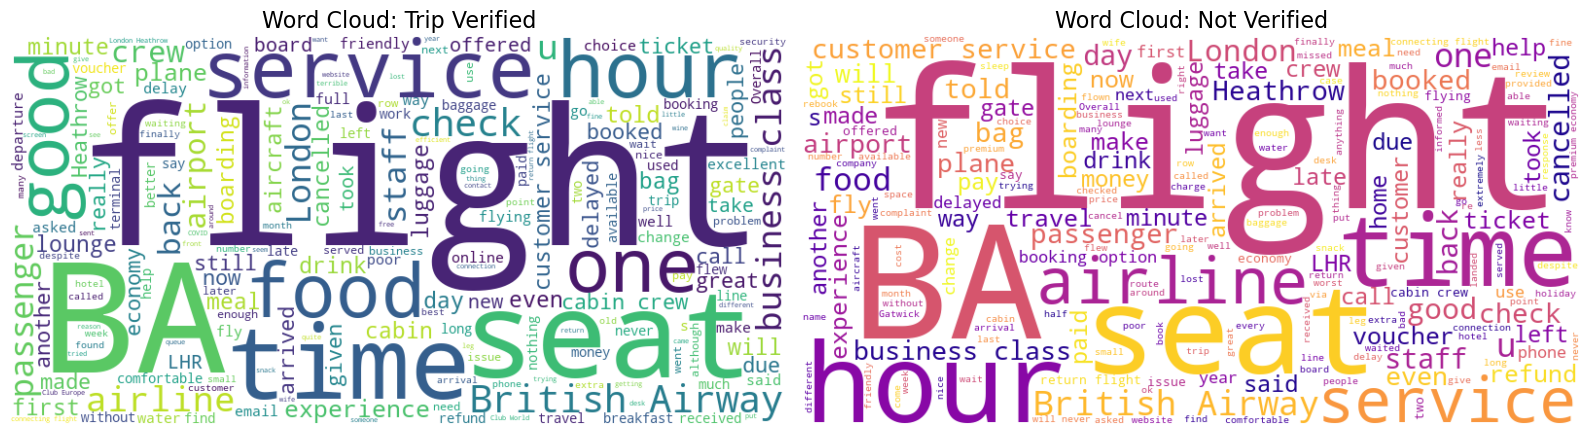

In [42]:
# Plotting the word clouds
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Verified Word Cloud
ax[0].imshow(verified_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Word Cloud: Trip Verified', fontsize=16)

# Non-Verified Word Cloud
ax[1].imshow(non_verified_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Word Cloud: Not Verified', fontsize=16)

plt.tight_layout()
plt.show()

In [43]:
# Calculate percentage of missing values
missing_percentage = file['verification_status'].isna().mean() * 100
print(f"Percentage of missing values in 'verification_status': {missing_percentage:.2f}%")

# Analyze reviews with missing values
missing_reviews = file[file['verification_status'].isna()]
print("Reviews with missing 'verification_status':")
print(missing_reviews)

Percentage of missing values in 'verification_status': 0.10%
Reviews with missing 'verification_status':
    verification_status                                        review_text
193                 NaN  cNot Verified |  I had hoped this would be a g...


In [44]:
# Replace missing values with the most frequent category
most_frequent = file['verification_status'].mode()[0]
file['verification_status'] = file['verification_status'].fillna(most_frequent)

# Save the updated file
file.to_csv("file_updated.csv", index=False)

In [45]:
# Add a column for review length
file['review_length'] = file['review_text'].str.len()

# Compare review lengths between groups
length_summary = file.groupby(file['verification_status'])['review_length'].describe()
print("Review length statistics by 'verification_status':")
print(length_summary)

Review length statistics by 'verification_status':
                     count        mean         std    min    25%    50%  \
verification_status                                                       
Not Verified         259.0  831.104247  589.099228  159.0  405.0  696.0   
Trip Verified        741.0  866.838057  616.191371  130.0  441.0  686.0   

                        75%     max  
verification_status                  
Not Verified          996.5  3477.0  
Trip Verified        1101.0  3464.0  


In [47]:
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer


In [48]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\254\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\254\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\254\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\254\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [53]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [54]:
# Define a text cleaning function
def clean_text(text):
    if pd.isna(text):  # Handle NaN values
        return text
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and URLs
    text = re.sub(r'http\S+|www\S+|[^a-z\s]', '', text)
    # Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

In [55]:
# Apply the cleaning function to the review_text column
file['cleaned_review_text'] = file['review_text'].apply(clean_text)

# Save the updated file
file.to_csv("file_cleaned.csv", index=False)

# Display the first few rows to verify the changes
print(file[['review_text', 'cleaned_review_text']].head())

                                         review_text  \
0    I booked through BA because Loganair don’t h...   
1    British airways lost bags in LHR then found ...   
2  The check in process and reward/loyalty progra...   
3    We flew in November 2023, but it took this l...   
4  I left for London from Johannesburg at 21:15 o...   

                                 cleaned_review_text  
0  booked ba loganair dont representative manches...  
1  british airway lost bag lhr found sent cologne...  
2  check process rewardloyalty program mess never...  
3  flew november took long seek satisfactory resp...  
4  left london johannesburg december issue flight...  


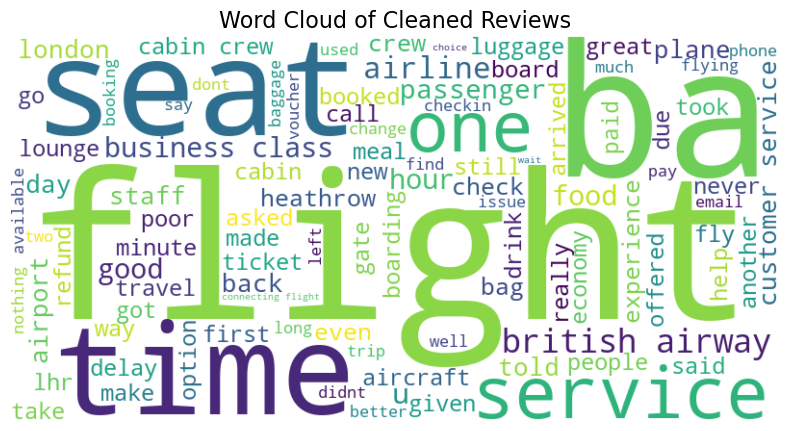

In [56]:
# Combine all cleaned review text into a single string
all_cleaned_text = " ".join(text for text in file['cleaned_review_text'].dropna())

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate(all_cleaned_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Reviews', fontsize=16)
plt.show()

In [58]:
# Load the file
file = pd.read_csv("file_cleaned.csv")

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to extract features
def extract_features(text):
    if pd.isna(text):
        return pd.Series([0, 0, 0, 0, 0, 0])  # Return default values for missing text

    # Word & character count
    word_count = len(word_tokenize(text))
    char_count = len(text)

    # Sentiment Analysis
    sentiment = sia.polarity_scores(text)
    sentiment_score = sentiment['compound']  # Overall sentiment score

    # Keyword flags (1 = present, 0 = absent)
    keywords = ["delay", "cancel", "lost", "excellent", "service", "rude"]
    keyword_flags = [1 if re.search(fr'\b{k}\b', text, re.IGNORECASE) else 0 for k in keywords]

    return pd.Series([word_count, char_count, sentiment_score] + keyword_flags)

# Apply feature extraction
feature_columns = ["word_count", "char_count", "sentiment_score"] + [f"keyword_{k}" for k in ["delay", "cancel", "lost", "excellent", "service", "rude"]]
file[feature_columns] = file["cleaned_review_text"].apply(extract_features)

# Convert 'verification_status' to numeric (0 = Not Verified, 1 = Trip Verified)
file['verification_status'] = file['verification_status'].map({'Trip Verified': 1, 'Not Verified': 0})

# Save the updated file
file.to_csv("file_features.csv", index=False)

# Display first few rows
print(file.head())


   verification_status                                        review_text  \
0                    1    I booked through BA because Loganair don’t h...   
1                    1    British airways lost bags in LHR then found ...   
2                    1  The check in process and reward/loyalty progra...   
3                    1    We flew in November 2023, but it took this l...   
4                    1  I left for London from Johannesburg at 21:15 o...   

   review_length                                cleaned_review_text  \
0            622  booked ba loganair dont representative manches...   
1            552  british airway lost bag lhr found sent cologne...   
2            233  check process rewardloyalty program mess never...   
3            383  flew november took long seek satisfactory resp...   
4           3064  left london johannesburg december issue flight...   

   word_count  char_count  sentiment_score  keyword_delay  keyword_cancel  \
0        53.0       392.0        

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset with extracted features
file = pd.read_csv("file_features.csv")

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=500)  # Keep top 500 words for efficiency

# Transform the text data
tfidf_matrix = tfidf.fit_transform(file['cleaned_review_text'].fillna(""))

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Merge with the original dataset (excluding raw text columns)
file = file.drop(columns=['cleaned_review_text', 'review_text'])  # Drop text columns
file = pd.concat([file, tfidf_df], axis=1)

# Save the final dataset with TF-IDF features
file.to_csv("file_tfidf.csv", index=False)

# Display first few rows
print(file.head())

   verification_status  review_length  word_count  char_count  \
0                    1            622        53.0       392.0   
1                    1            552        52.0       304.0   
2                    1            233        20.0       145.0   
3                    1            383        38.0       254.0   
4                    1           3064       263.0      1775.0   

   sentiment_score  keyword_delay  keyword_cancel  keyword_lost  \
0           0.1566            0.0             0.0           0.0   
1          -0.5423            0.0             0.0           1.0   
2          -0.7003            0.0             0.0           0.0   
3          -0.2978            0.0             0.0           0.0   
4          -0.9735            1.0             0.0           0.0   

   keyword_excellent  keyword_service  ...  working  world  worse     worst  \
0                0.0              0.0  ...      0.0    0.0    0.0  0.000000   
1                0.0              1.0  ...      

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the final dataset
file = pd.read_csv("file_tfidf.csv")

# Define features (X) and target variable (y)
X = file.drop(columns=['verification_status'])  # Drop target column
y = file['verification_status']  # Target: 0 (Not Verified) or 1 (Trip Verified)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features (excluding TF-IDF features)
scaler = StandardScaler()
X_train.iloc[:, :9] = scaler.fit_transform(X_train.iloc[:, :9])  # First 9 columns are engineered features
X_test.iloc[:, :9] = scaler.transform(X_test.iloc[:, :9])

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\254\AppData\Local\Temp\ipykernel_10656\670494408.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-4.00837371e-01  2.60715247e-01  2.01275734e+00 -4.88274500e-01
 -6.73047301e-01 -5.03122314e-01 -5.17970128e-01 -2.63424973e-02
  7.11098949e-01 -9.68353831e-01  2.04905200e+00 -6.73047301e-01
  1.23785403e-01 -8.73835119e-02 -6.58199486e-01 -4.37132028e-01
 -9.37008445e-01 -7.63783944e-01  2.13483937e+00  1.12023872e+00
  4.71884162e-01 -7.83581030e-01  1.48318530e+00 -1.25327926e-01
 -5.87259929e-01 -9.46906988e-01  7.26429318e-02 -7.76982001e-01
 -6.86245358e-01  2.04623504e-01 -4.55279357e-01 -6.26854100e-01
  3.33304562e-01  8.69475636e-01 -8.36373259e-01 -1.56673312e-01
  5.44956031e-02 -9.99699217e-01  8.56277579e-01  7.17697978e-01
 -6.94494144e-01  5.28458460e-02  3.68891061e+00 -1.17292372e+00
 -9.41957716e-01  9.12369322e-01  6.03864735e-01 -9.38658202e-01
 -5.01472557e-01 -3.34847085e-01 -1.1

Model Accuracy: 0.7400

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.74      1.00      0.85       148

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.55      0.74      0.63       200

Confusion Matrix:
 [[  0  52]
 [  0 148]]


C:\Users\254\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\254\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\254\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


my model is achieving an accuracy of 74%, but the classification report and confusion matrix show that it's heavily biased towards class 1. The model completely fails to classify class 0, predicting everything as 1. 

Issues Identified:
Class Imbalance

The dataset is imbalanced: 148 samples belong to class 1, while only 52 belong to class 0.
The model likely learned to always predict 1, which results in high accuracy but poor recall and precision for class 0.
Zero Precision, Recall, and F1-Score for Class 0

Since the model never predicts class 0, all metrics for class 0 are 0.00. This is a critical issue.
Confusion Matrix Confirms the Problem

The matrix [[0 52], [0 148]] means:
All 52 instances of class 0 were misclassified as 1.
All 148 instances of class 1 were correctly classified.
This further proves that the model is completely ignoring class 0.

In [66]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced')

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [68]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naïve Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.40      0.35        52
           1       0.77      0.69      0.73       148

    accuracy                           0.61       200
   macro avg       0.54      0.55      0.54       200
weighted avg       0.65      0.61      0.63       200

Confusion Matrix:
 [[ 21  31]
 [ 46 102]]


In [69]:
log_reg = LogisticRegression(class_weight='balanced', max_iter=950)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.44      0.36        52
           1       0.77      0.65      0.70       148

    accuracy                           0.59       200
   macro avg       0.54      0.55      0.53       200
weighted avg       0.65      0.59      0.61       200

Confusion Matrix:
 [[23 29]
 [52 96]]


C:\Users\254\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.74      0.99      0.85       148

    accuracy                           0.73       200
   macro avg       0.37      0.50      0.42       200
weighted avg       0.55      0.73      0.63       200

Confusion Matrix:
 [[  0  52]
 [  1 147]]


In [71]:
xgb_model = XGBClassifier(scale_pos_weight=(sum(y_train == 0) / sum(y_train == 1)))
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.23      0.29        52
           1       0.76      0.87      0.81       148

    accuracy                           0.70       200
   macro avg       0.58      0.55      0.55       200
weighted avg       0.67      0.70      0.68       200

Confusion Matrix:
 [[ 12  40]
 [ 19 129]]


In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to calculate and store results
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }

# Store results in a list
results = []

# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
results.append(evaluate_model("Naïve Bayes", nb_model, X_test, y_test))

# Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)
results.append(evaluate_model("Logistic Regression", log_reg, X_test, y_test))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
results.append(evaluate_model("Random Forest", rf_model, X_test, y_test))

# XGBoost
xgb_model = XGBClassifier(scale_pos_weight=(sum(y_train == 0) / sum(y_train == 1)))
xgb_model.fit(X_train, y_train)
results.append(evaluate_model("XGBoost", xgb_model, X_test, y_test))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display grid
print(results_df)

C:\Users\254\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision  Recall  F1 Score
0          Naïve Bayes     0.615   0.649011   0.615  0.628989
1  Logistic Regression     0.585   0.643191   0.585  0.606071
2        Random Forest     0.735   0.546633   0.735  0.626974
3              XGBoost     0.705   0.665497   0.705  0.677452


results show that Random Forest has the highest accuracy (0.735), while XGBoost has the highest F1 Score (0.677452) and precision (0.665497). Here’s a quick breakdown:

* Naïve Bayes performs decently but has lower accuracy.
* Logistic Regression has the lowest accuracy.
* Random Forest gives the best accuracy.
* XGBoost has a balanced performance.

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define parameter grids
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform GridSearchCV
rf_grid = GridSearchCV(rf, rf_params, scoring='accuracy', cv=5, n_jobs=-1)
xgb_grid = GridSearchCV(xgb, xgb_params, scoring='accuracy', cv=5, n_jobs=-1)

# Train models
rf_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)

# Get best parameters
best_rf = rf_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_

# Evaluate on test data
rf_best_score = best_rf.score(X_test, y_test)
xgb_best_score = best_xgb.score(X_test, y_test)

print(f"Best Random Forest Accuracy: {rf_best_score:.3f}")
print(f"Best XGBoost Accuracy: {xgb_best_score:.3f}")

C:\Users\254\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:29:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Random Forest Accuracy: 0.740
Best XGBoost Accuracy: 0.735


In [88]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='precision', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\254\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:37:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.685
Precision: 0.730
Recall: 0.912
F1 Score: 0.811


In [90]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid for fine-tuning
param_grid = {
    'n_estimators': [150, 200, 250],
    'learning_rate': [0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


C:\Users\254\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:11:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.9}
Accuracy: 0.735
Precision: 0.741
Recall: 0.986
F1 Score: 0.846


In [91]:
xgb_model = grid_search.best_estimator_

In [92]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [93]:
grid_search.predict

<bound method BaseSearchCV.predict of GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone

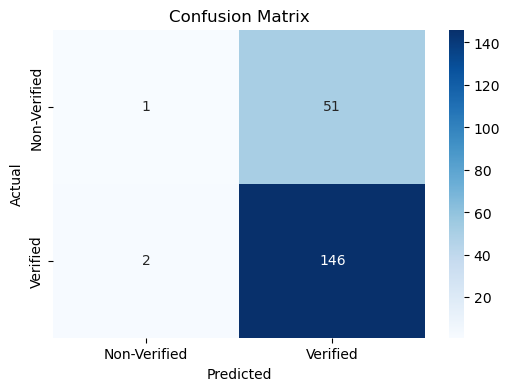

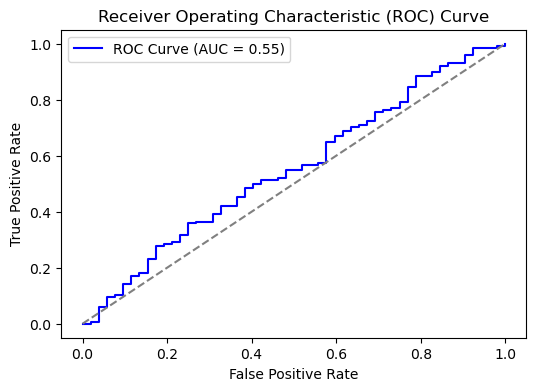

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Verified', 'Verified'], yticklabels=['Non-Verified', 'Verified'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

confusion matrix shows a high false positive rate (51 non-verified trips classified as verified). The ROC curve with an AUC of 0.55 suggests poor model performance—it is close to random guessing (AUC = 0.5).

as our model is predicting "Verified" too often, we can try
Resampling Techniques
Oversampling the minority class (Non-Verified trips): Using SMOTE (Synthetic Minority Over-sampling Technique

In [102]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_resampled))

# Train XGBoost again
best_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"New Accuracy: {accuracy:.3f}")
print(f"New Precision: {precision:.3f}")
print(f"New Recall: {recall:.3f}")
print(f"New F1 Score: {f1:.3f}")

Original class distribution: Counter({1: 593, 0: 207})
Resampled class distribution: Counter({1: 593, 0: 593})


C:\Users\254\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:45:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


New Accuracy: 0.690
New Precision: 0.756
New Recall: 0.858
New F1 Score: 0.804


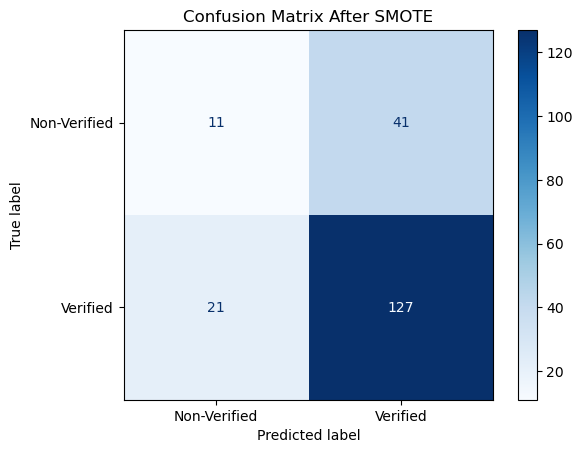

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Verified', 'Verified'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix After SMOTE")
plt.show()

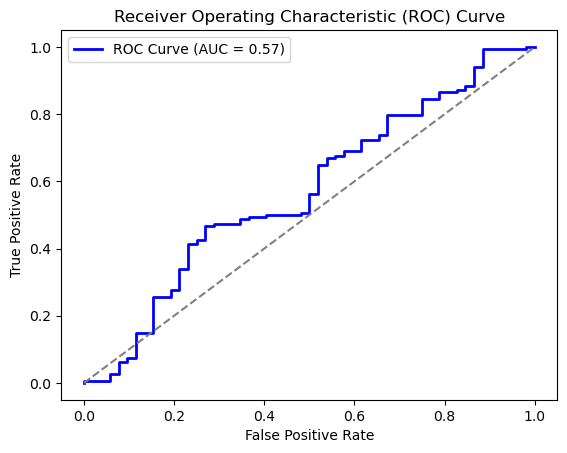

In [104]:
from sklearn.metrics import roc_curve, auc

# Get probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

confusion matrix and ROC curve show some improvement after applying SMOTE, but the results are still not ideal.

In [109]:
from sklearn.metrics import precision_recall_curve

# Get probabilities instead of hard labels
y_probs = best_model.predict_proba(X_test)[:, 1]  

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Find best threshold (e.g., one that maximizes F1-score)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[f1_scores.argmax()]

# Apply new threshold
y_pred_new = (y_probs >= best_threshold).astype(int)

# Recalculate metrics
accuracy = accuracy_score(y_test, y_pred_new)
precision = precision_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new)
f1 = f1_score(y_test, y_pred_new)

print(f"New Threshold: {best_threshold:.3f}")
print(f"New Accuracy: {accuracy:.3f}")
print(f"New Precision: {precision:.3f}")
print(f"New Recall: {recall:.3f}")
print(f"New F1 Score: {f1:.3f}")

New Threshold: 0.363
New Accuracy: 0.765
New Precision: 0.762
New Recall: 0.993
New F1 Score: 0.862


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
param_grid = {
    'n_estimators': [150, 200, 250],
    'learning_rate': [0.05, 0.1, 0.15],  # Reduced lower limit
    'max_depth': [4, 5, 6, 7],  # Increased upper limit
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],  # New parameter to avoid overfitting
    'min_child_weight': [1, 3, 5]  # Regularization parameter
}

xgb_model = xgb.XGBClassifier(eval_metric='logloss')

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

j